#Amazon Reviews - Sentiment Analysis
Implemented by Muhammad Hanan Asghar

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Dataset Prepration

In [1]:
!wget https://drive.google.com/uc?id=1VwEFJH367Y0WCXpX0e1RKAgkKkld9qnB&export=download

--2022-03-05 16:29:03--  https://drive.google.com/uc?id=1VwEFJH367Y0WCXpX0e1RKAgkKkld9qnB
Resolving drive.google.com (drive.google.com)... 142.250.1.113, 142.250.1.139, 142.250.1.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lp1s0977ur9qk3daljb713ov3rl97sr0/1646497725000/14779868553382701956/*/1VwEFJH367Y0WCXpX0e1RKAgkKkld9qnB [following]
--2022-03-05 16:29:04--  https://doc-0o-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lp1s0977ur9qk3daljb713ov3rl97sr0/1646497725000/14779868553382701956/*/1VwEFJH367Y0WCXpX0e1RKAgkKkld9qnB
Resolving doc-0o-0k-docs.googleusercontent.com (doc-0o-0k-docs.googleusercontent.com)... 173.194.193.132, 2607:f8b0:4001:c0f::84
Connecting to doc-0o-0k-docs.googleusercontent.com (doc-0o-0k-docs.googleusercontent.com)|173.194.193.132|:

In [2]:
import pandas as pd

data = pd.read_csv("/content/uc?id=1VwEFJH367Y0WCXpX0e1RKAgkKkld9qnB")

In [3]:
data.head()

,preprocessed_reviews,Values
0,dogs love saw pet store tag attached regarding...,1
1,used victor fly bait seasons ca not beat great...,1
2,product available victor traps unreal course t...,1
3,received shipment could hardly wait try produc...,1
4,really good idea final product outstanding use...,1


In [4]:
data['Values'].value_counts()

1    52600
0    52600
Name: Values, dtype: int64

In [5]:
data.isnull().sum()

preprocessed_reviews    231
Values                    0
dtype: int64

In [6]:
cleaned = data[~data['preprocessed_reviews'].isna()]

In [7]:
cleaned.isnull().sum()

preprocessed_reviews    0
Values                  0
dtype: int64

In [8]:
cleaned['Values'].value_counts()

0    52521
1    52448
Name: Values, dtype: int64

In [9]:
X = cleaned['preprocessed_reviews'].values
Y = cleaned['Values'].values

In [10]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
import string

def cleaner(line):
  line = line.lower()
  line = line.strip()
  table = str.maketrans('', '', string.punctuation+string.digits)
  words = line.split()
  stripped = [w.translate(table) for w in words]
  lmt_wrds = [lemmatizer.lemmatize(word) for word in stripped]
  line = " ".join(lmt_wrds)
  line = line.replace("  "," ")
  line = line.replace("  "," ")
  return line

In [ ]:
reviews = []
for idx, review in enumerate(X):
  x_review = cleaner(review) 
  reviews.append(x_review)
  print(f"Done text No: {idx+1}")

In [13]:
from sklearn.utils import shuffle

x, y = shuffle(reviews, Y)

In [14]:
x[:5]

['egg pasta ingredient powdered egg product not tasty containing real thing not like anything powdered price right not guess',
 'not know pace mexican four cheese discontinued googled husband went different grocery store looking since one ingredient one best personal recipe disappointed company discontinued something fine write pace next',
 'disappointed find lid earth best jarred food coated epoxy lining contains bpa thought avoiding whole bpa issue glass rather plastic container lid going get food food move around jar packaging shipping storage etc planning devoted earth best jarred food user organic glass found bpa note bpa not bother earth best food tasty enough tastier like plum',
 'gf cereal decent not get soggy easily relatively good huge fan apple cinnamon cheerio going gluten free really not compare well cereal not taste like cardboard not weird gluten free taste actually pretty good',
 'loved taste tea one day read ingredient contains modified corn starch really tea first tal

In [15]:
y[:5]

array([0, 0, 0, 1, 0])

#Word Cloud

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [17]:
def plot_word_cloud(sentences):
  long_string = ','.join(list(sentences))
  wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
  wordcloud.generate(long_string)
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud)
  plt.show()

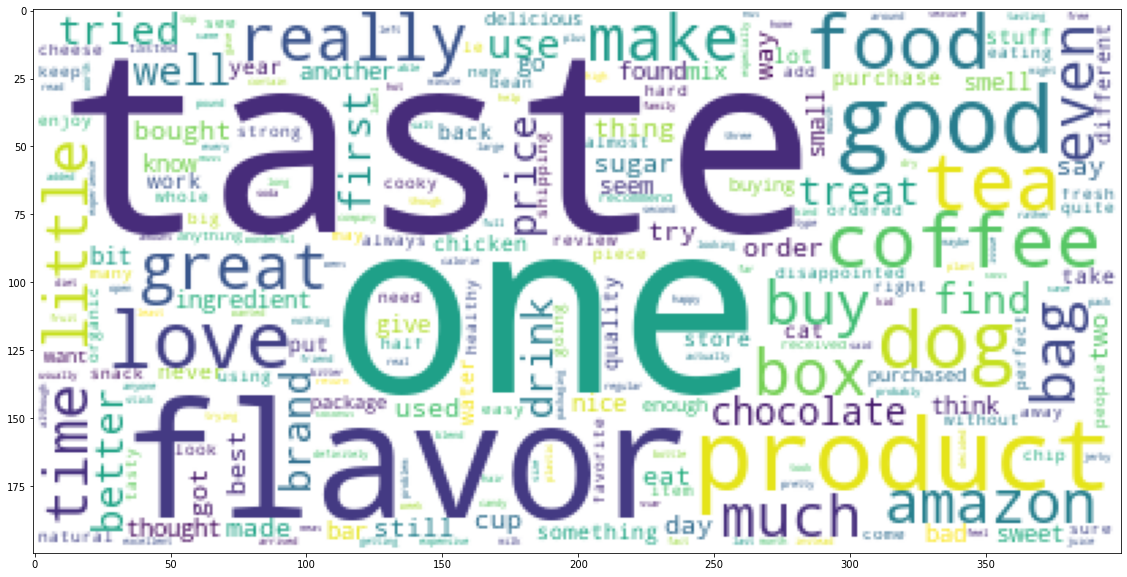

In [18]:
plot_word_cloud(x[:1000])

# Model

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(x)

In [21]:
sequences = tokenizer.texts_to_sequences(x)

In [22]:
max_sequence_len = max([len(sequence) for sequence in sequences])
max_sequence_len

1596

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="post", truncating="post")

In [24]:
import numpy as np

labels = np.array(y).reshape((-1, 1))
labels[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, random_state=42, test_size=0.1)

In [26]:
x_train.shape

(94472, 1596)

In [27]:
x_test.shape

(10497, 1596)

In [28]:
y_train.shape

(94472, 1)

In [29]:
y_test.shape

(10497, 1)

In [30]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\n Stopped Training!\n')
            self.model.stop_training = True

In [31]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

42288

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, 64, input_length=max_sequence_len),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(None, 1))),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1596, 64)          2706432   
                                                                 
 bidirectional (Bidirectiona  (None, 1596, 128)        66048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1596, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

In [34]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=adam, 
    metrics=['accuracy']
)

In [35]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="model.h5",  save_weights_only=True, verbose=1)
callback = myCallback()

In [36]:
history = model.fit(
    x_train, y_train, 
    batch_size=256,
    epochs=20,
    callbacks=[cp_callback, callback]
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


370/370 [==============================] - ETA: 0s - loss: 0.2843 - accuracy: 0.8846
Epoch 1: saving model to model.h5
370/370 [==============================] - 366s 957ms/step - loss: 0.2843 - accuracy: 0.8846
Epoch 2/20
370/370 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.9625
Epoch 2: saving model to model.h5
370/370 [==============================] - 354s 958ms/step - loss: 0.1138 - accuracy: 0.9625
Epoch 3/20
370/370 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9806
Epoch 3: saving model to model.h5
370/370 [==============================] - 354s 957ms/step - loss: 0.0641 - accuracy: 0.9806
Epoch 4/20
370/370 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9877
Epoch 4: saving model to model.h5
370/370 [==============================] - 353s 954ms/step - loss: 0.0412 - accuracy: 0.9877
Epoch 5/20
370/370 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9909
Epoch 5: saving model t

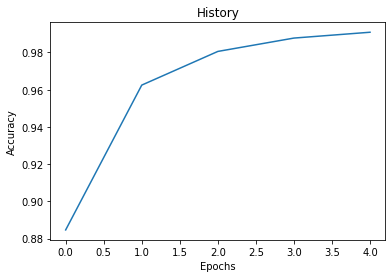

In [37]:
import matplotlib.pyplot as plt
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")

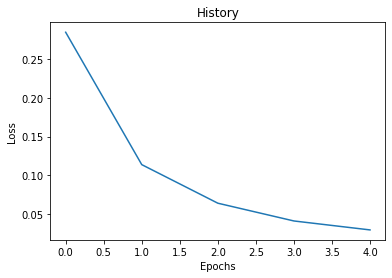

In [38]:
import matplotlib.pyplot as plt
fig = plt.plot(history.history['loss'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Loss")

In [39]:
x[45]

'lot research not get past fact grown china enough research mass pollution end dirt much u no way little girl going eating shame perfect snack also shame since company want save extra money must saving quite bit still ship back u still save money no thanks stick organic american food'

In [40]:
y[45]

0

In [41]:
pred = model.predict(tf.expand_dims(padded_sequences[45], 0))

In [42]:
pred #Correct

array([[0.00160263]], dtype=float32)

In [44]:
y[426]

1

In [45]:
x[426]

'grandchild love gummies buy product arrive time good product recommend friend'

In [46]:
pred = model.predict(tf.expand_dims(padded_sequences[426], 0))

In [47]:
pred #Correct

array([[0.99530584]], dtype=float32)

Implemented By Muhammad Hanan Asghar